In [42]:
import random
import matplotlib.pyplot as plt
from itertools import chain, zip_longest, groupby
import csv
import numpy as np
import pandas as pd

# Data preprocessing and representation

In [3]:
class Point():
    def __init__(self, name: str, x: float, y: float) -> None:
        self.name = name
        self.x_coord = round(float(x), 2)
        self.y_coord = round(float(y), 2)

    def get_name(self) -> str:
        return self.name

    def get_x(self) -> float:
        return self.x_coord

    def get_y(self) -> float:
        return self.y_coord

    def describe(self) -> str:
        return "Point {}: [{}, {}]".format(self.name, self.x_coord, self.y_coord)

In [4]:
class Dataset:
    def __init__(self, name: str, path: str) -> None:
        self.name = name
        self.path = path
        self.dimension = 0
        self.data = []
        self.distance_function = None
        self.parse_file()

    def parse_file(self) -> None:
        print(">>> Processing dataset {}".format(self.name))

        cities_arr = []

        with open(self.path) as file:
            lines = file.readlines()

            for line in lines:
                if line.startswith('NAME'):
                    self.name = line.split(':')[1].strip()
                elif line.startswith('DIMENSION'):
                    self.dimension = int(line.split(':')[1])
                elif line.startswith('NODE_COORD_SECTION'):
                    current_index = lines.index(line)
                    coords = []
                    for i in range(self.dimension):
                        city_name, x, y = lines[current_index + i + 1].split()
                        coords.append(Point(city_name, x, y))
                    self.data = coords

    def get_cities(self) -> list:
        return self.data

    def get_name(self) -> str:
        return self.name

    def get_path(self) -> str:
        return self.path

    def has_coords(self) -> bool:
        return len(self.data) != 0

    def describe(self) -> None:
        print("Dataset {} with {} nodes.".format(self.name, self.dimension))

    def describe_nodes(self) -> None:
        for coord in self.data:
            print(coord.describe())

In [5]:
with open('/content/drive/MyDrive/tsp/tsp_info/tsp_names.txt') as file:
  tsp_file_names = [line.rstrip() for line in file]
print(tsp_file_names)
optimal_distances = pd.read_csv('/content/drive/MyDrive/tsp/tsp_info/tsp_optimal_dist.csv')
processed_datasets = []
for elem in tsp_file_names:
  processed_datasets.append(Dataset(elem, '/content/drive/MyDrive/tsp/tsp_problems/{}'.format(elem)))

['a280.tsp', 'ali535.tsp', 'att48.tsp', 'att532.tsp', 'bayg29.tsp', 'bays29.tsp', 'berlin52.tsp', 'bier127.tsp', 'brazil58.tsp', 'brd14051.tsp', 'brg180.tsp', 'burma14.tsp', 'ch130.tsp', 'ch150.tsp', 'd1291.tsp', 'd15112.tsp', 'd1655.tsp', 'd18512.tsp', 'd198.tsp', 'd2103.tsp', 'd493.tsp', 'd657.tsp', 'dantzig42.tsp', 'dsj1000.tsp', 'eil101.tsp', 'eil51.tsp', 'eil76.tsp', 'fl1400.tsp', 'fl1577.tsp', 'fl3795.tsp', 'fl417.tsp', 'fnl4461.tsp', 'fri26.tsp', 'gil262.tsp', 'gr120.tsp', 'gr137.tsp', 'gr17.tsp', 'gr202.tsp', 'gr21.tsp', 'gr229.tsp', 'gr24.tsp', 'gr431.tsp', 'gr48.tsp', 'gr666.tsp', 'gr96.tsp', 'hk48.tsp', 'kroA100.tsp', 'kroA150.tsp', 'kroA200.tsp', 'kroB100.tsp', 'kroB150.tsp', 'kroB200.tsp', 'kroC100.tsp', 'kroD100.tsp', 'kroE100.tsp', 'lin105.tsp', 'lin318.tsp', 'linhp318.tsp', 'nrw1379.tsp', 'p654.tsp', 'pa561.tsp', 'pcb1173.tsp', 'pcb3038.tsp', 'pcb442.tsp', 'pla33810.tsp', 'pla7397.tsp', 'pla85900.tsp', 'pr1002.tsp', 'pr107.tsp', 'pr124.tsp', 'pr136.tsp', 'pr144.tsp', 'p

In [6]:
names = ['att48', 'bier127', 'fri26', 'gr17', 'pr226']
names = ['burma14']
used_datasets = [dataset for dataset in processed_datasets if dataset.get_name() in names]
print(used_datasets[0].get_name())
print(used_datasets[0].has_coords())
used_datasets[0].describe_nodes()

burma14
True
Point 1: [16.47, 96.1]
Point 2: [16.47, 94.44]
Point 3: [20.09, 92.54]
Point 4: [22.39, 93.37]
Point 5: [25.23, 97.24]
Point 6: [22.0, 96.05]
Point 7: [20.47, 97.02]
Point 8: [17.2, 96.29]
Point 9: [16.3, 97.38]
Point 10: [14.05, 98.12]
Point 11: [16.53, 97.38]
Point 12: [21.52, 95.59]
Point 13: [19.41, 97.13]
Point 14: [20.09, 94.55]


In [7]:
def get_distance(point_a, point_b):
    distance = ((point_a.get_x() - point_b.get_x()) ** 2 + (point_a.get_y() - point_b.get_y() )** 2) ** 0.5
    return distance

In [8]:
cols = ['iterations', 'dataset_name', 'population_size', 'num_of_generations', 'mutation_operator_name', 'iteration', 'generation', 'best_fitness', 'worst_fitness', 'avg_fitness', 'fitness_std', 'best_path']
final_results_df = pd.DataFrame(columns=cols)

In [9]:
final_results_df

,iterations,dataset_name,population_size,num_of_generations,mutation_operator_name,iteration,generation,best_fitness,worst_fitness,avg_fitness,fitness_std,best_path


# Mutations

In [10]:
class Mutation:
    def mutate(self, path: list):
        raise NotImplementedError("Method mutate() was not implemented!")

In [11]:
class SwapMutation:
    def __init__(self) -> None:
        super().__init__()
        self.name = "Swap Mutation"

    def get_name(self) -> str:
      return self.name

    def mutate(self, path: list) -> list:
        # print("Performing Swap Mutation")

        number_of_swaps = random.randint(1, len(path) // 2)

        for i in range(number_of_swaps):
            indices = random.sample(range(0, len(path) - 1), 2)
            first, second = indices[0], indices[1]

            path[first], path[second] = path[second], path[first]

        return path

In [12]:
class ReverseMutation(Mutation):
    def __init__(self) -> None:
        super().__init__()
        self.name = "Reverse Mutation"

    def get_name(self) -> str:
      return self.name

    def mutate(self, path: list) -> list:
        # print("performing reverse mutation")

        mut_len = random.randint(1, len(path) // 2)

        start_ind = random.randint(0, mut_len - 1)
        end_ind = start_ind + mut_len - 1

        path[start_ind:end_ind + 1] = path[start_ind:end_ind + 1][::-1]
        return path

In [13]:
class ExchangeMutation(Mutation):
    def __init__(self) -> None:
        super().__init__()
        self.name = "Exchange Mutation"

    def get_name(self) -> str:
      return self.name

    def mutate(self, path: list) -> list:
        # print("performing exchange mutation")

        mut_len = random.randint(1, len(path) // 2)
        # print("mut len: {}".format(mut_len))

        start_ind = random.randint(0, mut_len - 1)
        end_ind = start_ind + mut_len - 1
        # print("start ind {} and end ind {}".format(start_ind, end_ind))
        # print(individual)
        path[start_ind:end_ind + 1] = path[start_ind:end_ind + 1][::-1]

        subtour_ind = []
        for i in range(start_ind, end_ind + 1):
            subtour_ind.append(i)

        idices = []
        for i in range(start_ind):
            idices.append(i)

        for i in range(end_ind + 1, len(path) - 1):
            idices.append(i)
        # print("subtour ind: {}".format(subtour_ind))
        # print("outside ind: {}".format(idices))
        # choose a city in the substring and out the substring and swap them
        swapping_ind_subtour = random.choice(subtour_ind)
        swapping_ind_outside = random.choice(idices)
        path[swapping_ind_outside], path[swapping_ind_subtour] = path[swapping_ind_subtour], path[swapping_ind_outside]
        return path

In [14]:
class DisplacementMutation(Mutation):
    def __init__(self) -> None:
        super().__init__()
        self.name = "Displacement Mutation"

    def get_name(self) -> str:
      return self.name

    def mutate(self, path: list) -> list:
        # print("performing displacement mutation")

        mut_len = random.randint(1, len(path) // 2)
        # print("mut len: {}".format(mut_len))

        start_ind = random.randint(0, mut_len - 1)
        end_ind = start_ind + mut_len - 1
        # print("start ind {} and end ind {}".format(start_ind, end_ind))
        # print(individual)
        path[start_ind:end_ind + 1] = path[start_ind:end_ind + 1][::-1]

        subtour_ind = []
        for i in range(start_ind, end_ind + 1):
            subtour_ind.append(i)

        idices = []
        for i in range(start_ind):
            idices.append(i)

        for i in range(end_ind + 1, len(path) - 1):
            idices.append(i)


        rand_ind = random.choice(idices)

        if rand_ind < start_ind:
            left_one = path[0:rand_ind]
            left_two = path[rand_ind:start_ind]
            subtour = path[start_ind:end_ind + 1]
            right = path[end_ind + 1:]
            path = left_one + subtour + left_two + right

        if rand_ind > end_ind:
            right_one = path[end_ind + 1:rand_ind]
            right_two = path[rand_ind:]
            subtour = path[start_ind:end_ind + 1]
            left = path[0:start_ind]
            path = left + right_one + subtour + right_two

        return path

In [15]:
class EvenOddMutation(Mutation):
    def __init__(self) -> None:
        super().__init__()
        self.name = "Even-Odd Mutation"

    def get_name(self) -> str:
      return self.name

    def mutate(self, path: list) -> list:

        mut_len = random.randint(3, len(path) // 2)

        start_ind = random.randint(0, mut_len - 1)
        end_ind = start_ind + mut_len - 1

        subtour = path[start_ind:end_ind + 1]
        first = []
        second = []
        for i in range(0, len(subtour)):
            if i % 2 == 0:
                first.append(subtour[i])
            else:
                second.append(subtour[i])
        first = [first[-1]] + first[:-1]
        second = [second[-1]] + second[:-1]

        new = list(filter(None.__ne__ .chain.from_iterable(zip_longest(first,second))))
        path[start_ind:end_ind + 1] = new

        return path

In [16]:
class ShuffleMutation(Mutation):
    def __init__(self):
        super().__init__()
        self.name = "Even-Odd Mutation"

    def get_name(self) -> str:
      return self.name

    def mutate(self, path: list) -> list:
      mut_len = random.randint(2, len(path) // 2)

      start_ind = random.randint(1, mut_len - 1)
      end_ind = start_ind + mut_len - 1

      list_left = path[0:start_ind]

      list_mid = path[start_ind:end_ind]

      list_right = path[end_ind:]

      random.shuffle(list_mid)

      return list_left + list_mid + list_right

In [17]:
mutations = [SwapMutation(), ShuffleMutation(), EvenOddMutation(), DisplacementMutation(), ExchangeMutation(), ReverseMutation()]

In [18]:
mutations = [ReverseMutation()]

In [19]:
cols = ['iterations', 'dataset_name', 'population_size', 'num_of_generations', 'mutation_operator_name']
experiments_specifications = pd.DataFrame(columns=cols)

In [20]:
iteration = [00]
pop_sizes = [10, 50, 100, 200]
generations = [100, 200, 500, 1000]

In [21]:
for i in iteration:
  for j in used_datasets:
    for k in pop_sizes:
      for l in generations:
        for m in mutations:
          new_row = [i, j.get_name(), k, l, m.get_name()]
          experiments_specifications.loc[len(experiments_specifications)] = new_row

In [22]:
experiments_specifications.to_csv('/content/drive/MyDrive/tsp/experiment_specifications.csv')

# Algoritm

In [23]:
class Individual:
    def __init__(self, data: list, mutations: list) -> None:
        self.data = data
        self.length = len(self.data)
        self.fitness = 0
        self.mutation_operators = mutations

        self.calculate_fitness()

    def describe(self) -> None:
        fig, ax = plt.subplots()

        for elem in self.data:
            print(elem.describe())

            ax.scatter(elem.get_x(), elem.get_y(), linewidths=1.0)
            ax.annotate(elem.get_name(), (elem.get_x() + 0.25, elem.get_y() + 0.25))

        plt.show()

    def get_readable_solution(self) -> list:
        solution = self.data
        result = []
        for elem in self.data:
          result.append(elem.describe())
        return result

    def get_fitness(self) -> float:
        return self.fitness

    def get_length(self) -> int:
        return self.length

    def get_individual_solution(self) -> list:
        return self.data

    def get_mutations(self) -> list:
        return self.mutation_operators

    def calculate_fitness(self) -> float:
        for i in range(0, self.length - 2):
            self.fitness += get_distance(self.data[i], self.data[i + 1])
        self.fitness += get_distance(self.data[-1], self.data[0])
        self.fitness = round(self.fitness, 2)

    def mutate(self) -> None:
        mutation_possibility = random.uniform(0, 1)

        if mutation_possibility <= PROBABILITY:
            self.mutation_operator = random.choice(self.mutation_operators)
            self.data = self.mutation_operator.mutate(self.data)
        self.calculate_fitness()

In [24]:
class CrossoverOperator:
    def perform_crossover(self, parent_a: Individual, parent_b: Individual):
        raise NotImplementedError("Method perform_crossover() was not implemented!")

In [25]:
class SinglePointCrossover(CrossoverOperator):
  def __init__(self) -> None:
    super().__init__()
    self.name = "Single Point Crossover"

  def get_name(self) -> str:
    return self.name

  def perform_crossover(self, parent_a: Individual, parent_b: Individual) -> Individual:
    # TODO: make sure pivot is not 0 or len-1
    pivot = random.randrange(1, parent_a.get_length() - 1)
    print(pivot)

    data_a = parent_a.get_individual_solution()
    data_b = parent_b.get_individual_solution()

    child_a = Individual(data_a[:pivot] + data_b[pivot:], parent_a.get_mutations())
    child_b = Individual(data_b[:pivot] + data_a[pivot:], parent_b.get_mutations())

    if child_a.get_fitness() <= child_b.get_fitness():
      return child_a
    else:
      return child_b

In [26]:
# get a random point from the gr17 dataset
def get_random_two_paths(dataset: Dataset) -> Individual:
  return Individual(dataset.get_cities(), [ReverseMutation()]), Individual(dataset.get_cities()[::-1], [ReverseMutation()])

ind1, ind2 = get_random_two_paths(used_datasets[0])
print(ind1.get_length())
print(ind1.get_readable_solution())
print(ind2.get_length())
print(ind2.get_readable_solution())

print('testing single point crossover')
spc = SinglePointCrossover()

result = spc.perform_crossover(ind1, ind2)

print(result.get_readable_solution())

14
['Point 1: [16.47, 96.1]', 'Point 2: [16.47, 94.44]', 'Point 3: [20.09, 92.54]', 'Point 4: [22.39, 93.37]', 'Point 5: [25.23, 97.24]', 'Point 6: [22.0, 96.05]', 'Point 7: [20.47, 97.02]', 'Point 8: [17.2, 96.29]', 'Point 9: [16.3, 97.38]', 'Point 10: [14.05, 98.12]', 'Point 11: [16.53, 97.38]', 'Point 12: [21.52, 95.59]', 'Point 13: [19.41, 97.13]', 'Point 14: [20.09, 94.55]']
14
['Point 14: [20.09, 94.55]', 'Point 13: [19.41, 97.13]', 'Point 12: [21.52, 95.59]', 'Point 11: [16.53, 97.38]', 'Point 10: [14.05, 98.12]', 'Point 9: [16.3, 97.38]', 'Point 8: [17.2, 96.29]', 'Point 7: [20.47, 97.02]', 'Point 6: [22.0, 96.05]', 'Point 5: [25.23, 97.24]', 'Point 4: [22.39, 93.37]', 'Point 3: [20.09, 92.54]', 'Point 2: [16.47, 94.44]', 'Point 1: [16.47, 96.1]']
testing single point crossover
7
['Point 14: [20.09, 94.55]', 'Point 13: [19.41, 97.13]', 'Point 12: [21.52, 95.59]', 'Point 11: [16.53, 97.38]', 'Point 10: [14.05, 98.12]', 'Point 9: [16.3, 97.38]', 'Point 8: [17.2, 96.29]', 'Point 8

In [27]:
class DoublePointCrossover(CrossoverOperator):
  def __init__(self) -> None:
    super().__init__()
    self.name = "Double Point Crossover"

  def get_name(self) -> str:
    return self.name

  def perform_crossover(self, parent_a: Individual, parent_b: Individual):
    pivot_a = random.randint(1, parent_a.get_length() - 2)
    pivot_b = random.randint(1, parent_a.get_length() - 2)

    # assure pivots are different indices
    while pivot_a == pivot_b:
      pivot_b = random.randint(1, parent_a.get_length() - 2)

    # assure pivot_a is smaller than pivot_b
    if pivot_a > pivot_b:
      pivot_a, pivot_b = pivot_b, pivot_a

    child_a = parent_a[:pivot_a] + parent_b[pivot_a:pivot_b] + parent_a[pivot_b:]
    child_b = parent_b[:pivot_a] + parent_a[pivot_a:pivot_b] + parent_b[pivot_b:]

    individual_1, individual_2 = Individual(child_1, self.which_mutation), Individual(child_2, self.which_mutation)

    # generates two children and chooses the better one
    if individual_1.get_fitness() < individual_2.get_fitness():
        result = individual_1
    else:
        result = individual_2

    return result

In [28]:
results = pd.DataFrame()

In [29]:
class Population:
  def __init__(self, individuals: list) -> None:
    self.individuals = individuals
    self.fitness = 0

    self.calculate_fitness()

  def add(self, individual: Individual) -> None:
    self.individuals.append(individual)

  def remove(self, individual: Individual) -> None:
    self.inidividuals.remove(individual)

  def sort_population(self, desc=True) -> None:
    self.individuals.sort(key= lambda x: x.fitness, reverse=True)

  def get_fittest(self) -> Individual:
    self.sort_population()
    return self.individuals[0]

  def get_worst(self) -> Individual:
    self.sort_population()
    return self.individuals[-1]

  def calc_fitness(self) -> None:
    result = 0
    for ind in self.individuals:
      result += ind.get_fitness()
    self.fitness = result

  def get_fitness(self) -> float:
    self.calculate_fitness()
    return self.fitness

In [ ]:
class TournamentSelection:
  def __init__(self):
    self.name = "Tournament Selection"

In [ ]:
class ProportionalRouletteSelection:
  def __init__(self):
    self.name = "Proportional Roulette Selection"

In [ ]:
class RankBasedRouletteSelection:
  def __init__(self):
    self.name = "Rank Based Roulette Selection"

In [ ]:
class GeneticAlgorithm:
    def __init__(self, pop_size: int, gen_num: int, dataset: Dataset, mutation: Mutation, path_to_result_file: str, rep: int) -> None:
        self.population_size = pop_size
        self.current_generation = [] # an array of size of population_size of Individuals
        self.number_of_generations = gen_num
        self.best_per_gen = []
        self.worst_per_gen = []
        self.avg_per_gen = []
        self.dataset = dataset
        self.current_parents = []
        self.generation_fitness = 0
        self.which_generation = 0
        self.which_mutation = mutation
        self.result_file = path_to_result_file
        self.which_rep = rep

    def increment_generation(self) -> None:
        self.which_generation += 1

    def run(self) -> Individual:
      # print("\tRunning the GA with population size [{}] for {} generations.".format(
      #     self.population_size,
      #     self.number_of_generations))

      # initialize population
      self.initialise_population()

      for i in range(self.number_of_generations):
          self.increment_generation()

          self.current_parents = []
          self.current_parents = self.parent_selection()

          self.current_generation = self.kill_worst_individuals()
          self.generate_offspring()
          self.calculate_current_generation_fitness()

          self.save_current_generation_info()
          print("best dist in gen {}: {}, gen fitness {}".format(i, self.current_generation[0].get_fitness(), self.generation_fitness))

      # return a list of best individuals per generation
      return self.best_per_gen

    def kill_worst_individuals(self):
        smaller_generation = self.current_generation[:len(self.current_generation)//2]
        return smaller_generation

    def initialise_population(self):
        # generates a population of the given size
        starting_path = self.dataset.get_cities()

        self.current_generation = [Individual(list(np.random.permutation(starting_path)), self.which_mutation) for _ in range(self.population_size)]
        population_fitness = self.calculate_current_generation_fitness()

        self.current_generation.sort(key= lambda x: x.fitness)
        self.save_current_generation_info()

    def save_current_generation_info(self):
      # sorting the population based on the distance
        self.current_generation.sort(key= lambda x: x.fitness)
        self.best_per_gen.append((self.current_generation[0], self.current_generation[0].get_fitness()))

        with open(self.result_file, 'a') as result_file:
            row = [self.which_rep,
                   self.dataset.get_name(),
                   self.population_size,
                   self.which_generation,
                   self.number_of_generations,
                   self.current_generation[0].get_fitness(),
                   self.current_generation[-1].get_fitness(),
                   np.mean([elem.fitness for elem in self.current_generation]),
                   self.generation_fitness
                   ]

            writer = csv.writer(result_file)
            writer.writerow(row)

    def calculate_current_generation_fitness(self):
        self.generation_fitness = 0
        for individual_path in self.current_generation:
            self.generation_fitness += individual_path.get_fitness()
        return self.generation_fitness

    def parent_selection(self):
        # select two fittest individuals to be parents
        # sorting the population based on the distance
        self.current_generation.sort(key= lambda x: x.fitness)
        # parents = self.current_generation[:2]
        parents = random.sample(self.current_generation, 2)
        return parents

    def generate_offspring(self):  # DONE
        number_of_offspring_to_create = self.population_size - len(self.current_generation)

        # generating new offspring (number of children is equal to the size of the population)
        for i in range(0, number_of_offspring_to_create - 1):
            new_offspring = self.crossover(self.current_parents)
            # mutating a child after generating it
            new_offspring.mutate()
            # appending newly created and mutated child to the population
            self.current_generation.append(new_offspring)

        # sorting the population based on the distance
        self.current_generation.sort(key= lambda x: x.fitness)
        # cutting off the weakest individuals so the population size is the same as in the beginning
        self.current_generation = self.current_generation[:self.population_size]
        # sorting the population based on the distance
        self.current_generation.sort(key= lambda x: x.fitness)

# Experiments

In [53]:
class Experiment:
  def __init__(self, population_sizes: list, dataset_names: list, generations: list, repetitions: int):
    self.population_sizes = population_sizes
    self.generations = generations
    self.datasets = self.create_datasets(dataset_names)
    self.repetitions = repetitions

    self.results_df = pd.DataFrame(columns=['rep', 'gen', 'pop', 'dataset', 'a', 'b', 'c'])

  def create_datasets(self, dataset_names):
    return [Dataset(name, '/content/drive/MyDrive/tsp/tsp_problems/{}'.format(name)) for name in dataset_names]

  def dummy_result(self):
    return [1,2,3]

  def get_result_df(self) -> pd.DataFrame:
    return self.results_df

  def run(self):
    for dataset in self.datasets:
      for pop in self.population_sizes:
        for gen in self.generations:
          for rep in range(1, self.repetitions + 1):
            # print("[REP {}] Running the experiment for population size {}, on the {}, for {} generations.".format(rep, pop, dataset.get_name(), gen))

            # Get the dummy data
            dummy_data = self.dummy_result()

            # Append a row to the results DataFrame
            row = [rep, gen, pop, dataset.get_name()] + dummy_data
            self.results_df.loc[len(self.results_df)] = row
    # self.results_df.to_csv('result.csv', index=False)

In [54]:
three_datasets = ['gr17.tsp', 'att48.tsp']

In [55]:
repetitions = 100

# get different population sizes
population_sizes = [20, 50, 100]

# get different generations lengths
generations = [50, 150, 300]

# get all datasets processed
datasets = three_datasets

# mutation_operator = ReverseMutation()
mutation_operators = [DisplacementMutation(), ReverseMutation(), ExchangeMutation(), ShuffleMutation()]

experiment = Experiment(population_sizes, datasets, generations, repetitions)

experiment.run()

data = experiment.get_result_df()

PROBABILITY = 0.5

>>> Processing dataset gr17.tsp
>>> Processing dataset att48.tsp


In [56]:
data

,rep,gen,pop,dataset,a,b,c
0,1,50,20,gr17,1,2,3
1,2,50,20,gr17,1,2,3
2,3,50,20,gr17,1,2,3
3,4,50,20,gr17,1,2,3
4,5,50,20,gr17,1,2,3
...,...,...,...,...,...,...,...
1795,96,300,100,att48,1,2,3
1796,97,300,100,att48,1,2,3
1797,98,300,100,att48,1,2,3
1798,99,300,100,att48,1,2,3


In [ ]:
att48_minimum_distance = 33523
p01_minimum_distance = 291

In [ ]:
header = ['repetition', 'dataset name', 'population size', 'generation', 'number of generations', 'best distance', 'worst distance', 'average distance', 'generation fitness']

In [ ]:
with open('/content/drive/MyDrive/tsp_data/results/p01_results.csv', 'w') as p01_writer:
    writer = csv.writer(p01_writer)
    writer.writerow(header)

In [ ]:
with open('/content/drive/MyDrive/tsp_data/results/att48_results.csv', 'w') as att48_writer:
    writer = csv.writer(att48_writer)
    writer.writerow(header)

In [ ]:
filename = '/content/drive/MyDrive/tsp_data/results/p01_results.csv'

best_p01_individuals = {}

# run all scenarios for P01
for i in range(1, repetitions + 1):
    print("Repetition #{}".format(i))
    for j in range(len(population_sizes)):
        for k in range(len(generations)):
            genetic_algorithm_instance = GeneticAlgorithm(pop_size=population_sizes[j],
                                                          gen_num=generations[k],
                                                          dataset=p01_dataset,
                                                          mutation=mutation_operators,
                                                          path_to_result_file=filename,
                                                          rep=i)
            best_individuals_per_gen = genetic_algorithm_instance.run()
            dictionary_name = "rep {}, pop_size {}, generations {}, dataset p01".format(i, population_sizes[j], generations[k])
            best_p01_individuals[dictionary_name] = best_individuals_per_gen

In [ ]:
filename = '/content/drive/MyDrive/tsp_data/results/att48_results.csv'

best_att48_individuals = {}

# run all scenarios for ATT48
for i in range(1, repetitions + 1):
    print("Repetition #{}".format(i))
    for j in range(len(population_sizes)):
        for k in range(len(generations)):
            genetic_algorithm_instance = GeneticAlgorithm(pop_size=population_sizes[j],
                                                          gen_num=generations[j],
                                                          dataset=att48_dataset,
                                                          mutation=mutation_operators,
                                                          path_to_result_file=filename,
                                                          rep=i)
            best_individuals_per_gen = genetic_algorithm_instance.run()
            dictionary_name = "rep {}, pop_size {}, generations {}, dataset att48".format(i, population_sizes[j], generations[k])
            best_att48_individuals[dictionary_name] = best_individuals_per_gen

# Data Visualisation

In [ ]:
import pandas as pd

In [ ]:
p01_csv = '/content/drive/MyDrive/tsp_data/results/p01_results.csv'

In [ ]:
att48_csv = '/content/drive/MyDrive/tsp_data/results/att48_results.csv'

In [ ]:
p01_result = pd.read_csv(p01_csv)

In [ ]:
att48_result = pd.read_csv(att48_csv)

In [ ]:
p01_result.head()

,repetition,dataset name,population size,generation,number of generations,best distance,worst distance,average distance,generation fitness
0,1,p01,20,0,20,502.68,692.77,586.121500,11722.43
1,1,p01,20,1,20,457.57,581.49,534.683684,10158.99
2,1,p01,20,2,20,455.20,536.06,488.391579,9279.44
3,1,p01,20,3,20,454.53,535.50,485.579474,9226.01
4,1,p01,20,4,20,454.53,535.50,478.418421,9089.95


In [ ]:
att48_result.head()

,repetition,dataset name,population size,generation,number of generations,best distance,worst distance,average distance,generation fitness
0,1,att48,20,0,20,122337.03,177082.16,153198.481000,3063969.62
1,1,att48,20,1,20,116721.29,152534.05,137044.649474,2603848.34
2,1,att48,20,2,20,116721.29,136537.02,123130.045263,2339470.86
3,1,att48,20,3,20,116721.29,120229.45,117268.911579,2228109.32
4,1,att48,20,4,20,116721.29,116721.29,116721.290000,2217704.51


In [ ]:
p01_best_coords = [[-0.0000000400893815,0.0000000358808126],
[-21.4983260706612533,-7.3194159498090388],
[-43.0700258454450875,-14.5548396888330487],
[-50.4808382862985496,-7.3744722432402208],
[-64.7472605264735108,-21.8981713360336698],
[-72.0785319657452987,-0.1815834632498404],
[-79.2915791686897506,21.4033307581457670],
[-65.0865638413727368,36.0624693073746769],
[-57.5687244704708050,43.2505562436354225],
[-50.5859026832315024,21.5881966132975371],
[-36.0366489745023770,21.6135482886620949],
[-29.0584693142401171,43.2167287683090606],
[-14.6577381710829471,43.3895496964974043],
[-0.1358203773809326,28.7292896751977480],
[-0.0000000400893815,0.0000000358808126]]

In [ ]:
p01_point = [Point('point', elem[0], elem[1]) for elem in p01_best_coords]

In [ ]:
ind_p01 = Individual(p01_point, mutation_operators)

In [ ]:
print(ind_p01.get_fitness())

247.69


In [ ]:
print(best_p01_individuals['rep 1, pop_size 20, generations 50, dataset p01'])

[(<__main__.Individual object at 0x7fb089f130d0>, 532.0), (<__main__.Individual object at 0x7fb089f130d0>, 532.0), (<__main__.Individual object at 0x7fb089f13bb0>, 504.33), (<__main__.Individual object at 0x7fb089f13670>, 429.71), (<__main__.Individual object at 0x7fb089f13670>, 429.71), (<__main__.Individual object at 0x7fb089f13670>, 429.71), (<__main__.Individual object at 0x7fb089f13670>, 429.71), (<__main__.Individual object at 0x7fb089f13700>, 382.62), (<__main__.Individual object at 0x7fb089f13700>, 382.62), (<__main__.Individual object at 0x7fb089f13700>, 382.62), (<__main__.Individual object at 0x7fb089f13700>, 382.62), (<__main__.Individual object at 0x7fb089f13700>, 382.62), (<__main__.Individual object at 0x7fb089f13700>, 382.62), (<__main__.Individual object at 0x7fb089f13700>, 382.62), (<__main__.Individual object at 0x7fb089f13820>, 371.71), (<__main__.Individual object at 0x7fb089ef0fa0>, 357.24), (<__main__.Individual object at 0x7fb089ef0fa0>, 357.24), (<__main__.Indi

In [ ]:
from matplotlib.animation import FuncAnimation

In [ ]:
mytuple = (1, 'str')

In [ ]:
current_obj, current_float = mytuple

In [ ]:
current_float

'str'

In [ ]:
    # def describe(self):
    #     fig, ax = plt.subplots()

    #     for elem in self.data:
    #         print(elem.describe())

    #         ax.scatter(elem.get_x(), elem.get_y(), linewidths=1.0)
    #         ax.annotate(elem.get_name(), (elem.get_x() + 0.25, elem.get_y() + 0.25))

    #     plt.show()

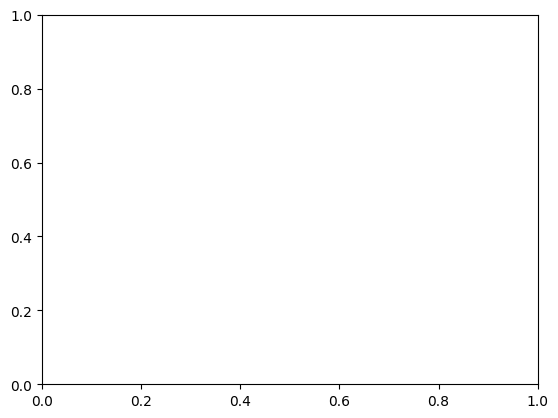

In [ ]:
fig, ax = plt.subplots()

In [ ]:
def update(frame):
    # Clear the previous plot
    ax.clear()
    # Get the current object and float from the dictionary
    current_obj, current_float = best_p01_individuals[frame]
    # Plot the current object
    ax.plot(current_obj.x_values, current_obj.y_values)
    # Set the title of the plot
    ax.set_title(f'Object {frame} at float value {current_float}')

In [ ]:
animation = FuncAnimation(fig, update, frames=my_dict.keys(), repeat=True)

In [ ]:
one_ind = best_p01_individuals['rep 1, pop_size 20, generations 50, dataset p01'][-1]

In [ ]:
print(one_ind)

(<__main__.Individual object at 0x7fb089f0a850>, 355.6)


Point B: [-28.87, -0.0]
None
Point H: [-36.04, 21.61]
None
Point D: [-14.66, 43.39]
None
Point F: [-29.06, 43.22]
None
Point K: [-0.14, 28.73]
None
Point A: [-0.0, 0.0]
None
Point O: [-43.07, -14.55]
None
Point E: [-64.75, -21.9]
None
Point I: [-50.48, -7.37]
None
Point J: [-50.59, 21.59]
None
Point C: [-79.29, 21.4]
None
Point G: [-72.08, -0.18]
None
Point L: [-65.09, 36.06]
None
Point N: [-57.57, 43.25]
None
Point M: [-21.5, -7.32]
None


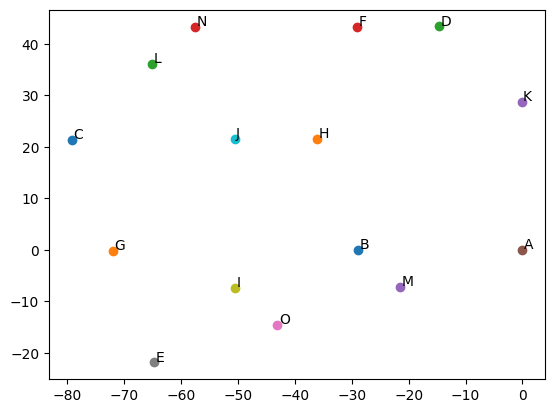

In [ ]:
one_ind[0].describe()